In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import os
from termcolor import colored
from scipy import stats
import plotly.express as px
from plotly.figure_factory import create_scatterplotmatrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [17]:
data = pd.read_csv("/content/diabetes_data.csv")
data

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

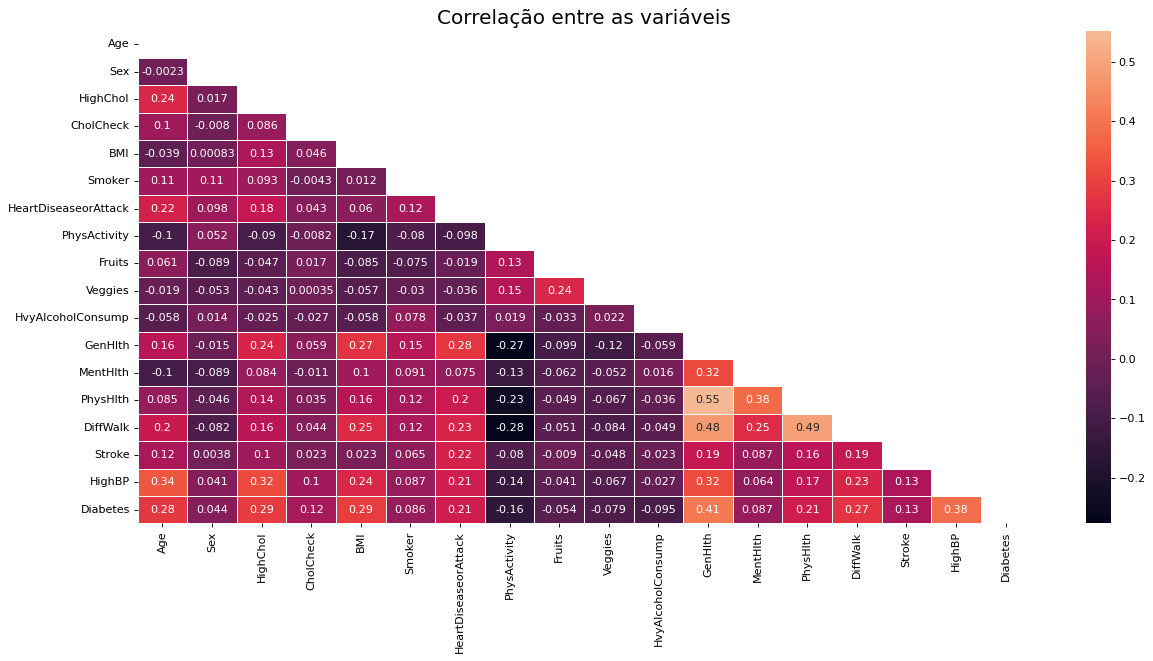

In [18]:
# Analisando a correlação entre as diversas variáveis do dataset

plt.figure(figsize=(18,8), dpi= 80)
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), mask=matrix, xticklabels=data.corr().columns, yticklabels=data.corr().columns, cmap='rocket', center=0.2, linewidths=0.5, linecolor='#FFFFFF', annot=True)

plt.title('Correlação entre as variáveis', fontsize=18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

<ipython-input-26-8fe17bc45007>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data_variables.corrwith(data_target), palette= palette).yaxis.grid(True)


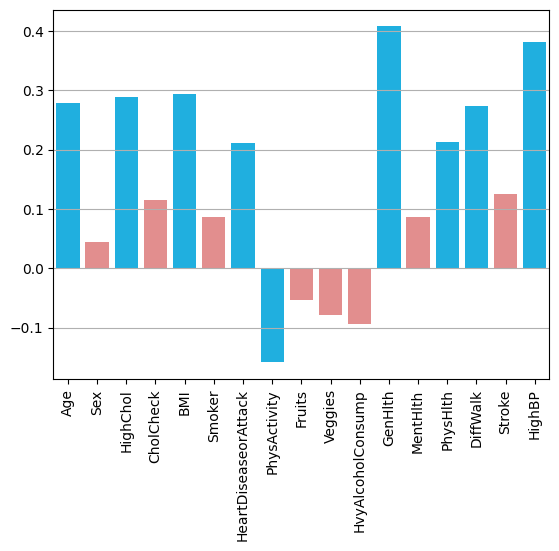

In [26]:
# Analisando, de forma isolada, a correlação entre cada variável com a variável alvo, 'Diabetes'

data_variables = data.drop('Diabetes', axis=1)
data_target = data['Diabetes']

# Criando uma paleta para diferenciar as variáveis mais correlacionadas a 'Diabetes'. Critério usado foi que o absoluto deve ser maior ou igual a 0.15
palette = ['deepskyblue' if abs(corr) >= 0.15 else 'lightcoral' for corr in data_variables.corrwith(data_target)]

sns.barplot(data_variables.corrwith(data_target), palette= palette).yaxis.grid(True)
plt.xticks(rotation=90)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

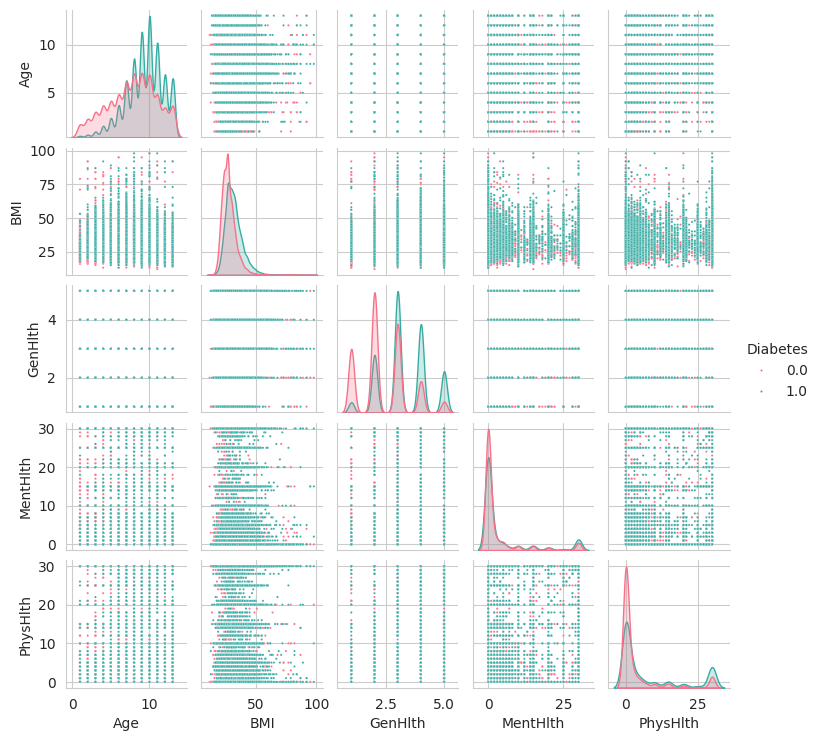

In [ ]:
# Analisando a correlação entre as variáveis númericas do dataset

sns.pairplot(data, hue='Diabetes', vars=['Age', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth'], palette='husl', height=1.5,aspect=1, plot_kws={ 's': 2.5 })
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

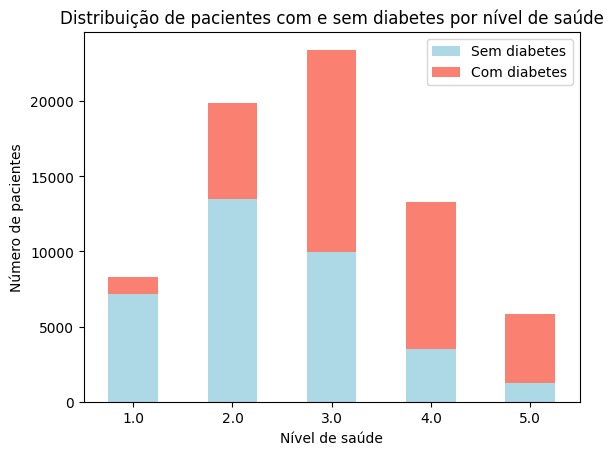

In [37]:
# Fazendo a separação entre com e sem diabetes nos níveis de saúde

health_diabetes_count = data.groupby(['GenHlth', 'Diabetes']).size().unstack()

health_diabetes_count.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])

plt.xticks(rotation=360)
plt.xlabel('Nível de saúde')
plt.ylabel('Número de pacientes')
plt.title('Distribuição de pacientes com e sem diabetes por nível de saúde')
plt.legend(['Sem diabetes', 'Com diabetes'])
plt.show()

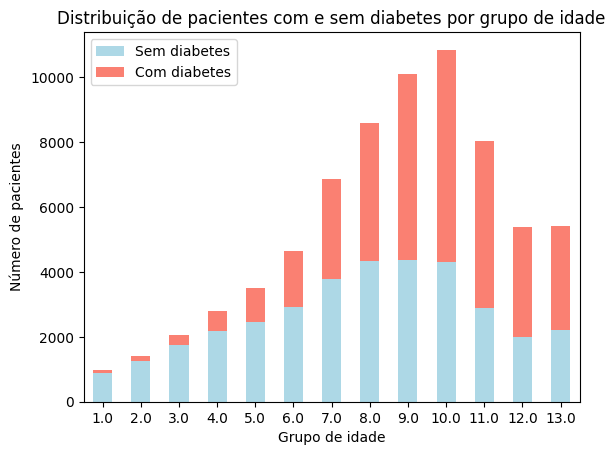

In [34]:
# Fazendo a separação entre com e sem diabetes nos grupos de idade

health_diabetes_count = data.groupby(['Age', 'Diabetes']).size().unstack()

health_diabetes_count.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])

plt.xticks(rotation=360)
plt.xlabel('Grupo de idade')
plt.ylabel('Número de pacientes')
plt.title('Distribuição de pacientes com e sem diabetes por grupo de idade')
plt.legend(['Sem diabetes', 'Com diabetes'])
plt.show()

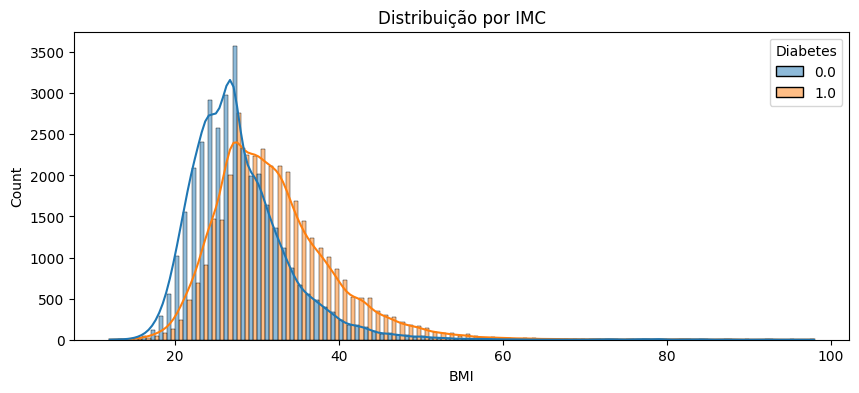

In [32]:
# Fazendo a separação entre com e sem diabetes na distribuição dos IMCs

plt.figure(figsize=(10,4))
sns.histplot(x='BMI',hue='Diabetes',data=data, binwidth=1, kde=True, multiple='dodge')
plt.title('Distribuição por IMC')
plt.show()